In [1]:
import ct_utilities as ctu
import pandas as pd
import numpy as np
import nglview as nv
import parmed as pmd
import MDAnalysis as mda
import seaborn as sns
import os

In [2]:
workdir = '/home/andreap/Storage/andreap/SLC25A1_replica'

# Visual inspection

In [13]:
l='isocitrato'
amb = pmd.load_file(f'{workdir}/{l}/{l}_input.parm7', f'{workdir}/{l}/{l}_input.rst7')

In [14]:
u = mda.Universe(amb)

In [15]:
lig = u.select_atoms('resid 298')
nv.show_mdanalysis(lig)

NGLWidget()

# Create inputs

In [8]:
ligandi = ['citrato', 'isocitrato', 'malato']
ligname = ['CIT', 'ISO', 'MAL']
i=0



for l in ligandi:
    os.mkdir(f'{workdir}/{l}/cpp_analysis')
    
    parm7 = f"{workdir}/{l}/{l}_input.parm7"
    TRAJ_OUTPUT = f"{workdir}/{l}"
    
    intrahb = ctu.input_intrahb(parm7, TRAJ_OUTPUT, 298)
    os.mkdir(f'{workdir}/{l}/cpp_analysis/intrahbonds')
    with open(f'{TRAJ_OUTPUT}/cpp_analysis/intrahbonds/intrahbonds.in', 'w') as fo:
        fo.write(intrahb)
        
    intrasb = ctu.input_intrasb(parm7, TRAJ_OUTPUT, 298)
    os.mkdir(f'{workdir}/{l}/cpp_analysis/intrasaltbridges')
    with open(f'{TRAJ_OUTPUT}/cpp_analysis/intrasaltbridges/intrasaltbridges.in', 'w') as fo:
        fo.write(intrasb)
    
    intrahp = ctu.input_intrahp(parm7, TRAJ_OUTPUT, 298)
    os.mkdir(f'{workdir}/{l}/cpp_analysis/intrahydrophobics')
    with open(f'{TRAJ_OUTPUT}/cpp_analysis/intrahydrophobics/intrahydrophobics.in', 'w') as fo:
        fo.write(intrahp)
    
    lig_hb = ctu.input_lighb(parm7, TRAJ_OUTPUT, 298, ligname[i])
    os.mkdir(f'{workdir}/{l}/cpp_analysis/lig_hbonds')
    with open(f'{TRAJ_OUTPUT}/cpp_analysis/lig_hbonds/lig_hbonds.in', 'w') as fo:
        fo.write(lig_hb)
        
#     lig_sb = ctu.input_ligsb(parm7, TRAJ_OUTPUT, 298, ligA=':299@O1,O3,O9,O10,O12,O13')
#     with open(f'{TRAJ_OUTPUT}/cpp_analysis/lig_saltbridges/lig_saltbridges.in', 'w') as fo:
#         fo.write(lig_sb)
        
    lig_hp = ctu.input_lighp(parm7, TRAJ_OUTPUT, 298, ligname[i])
    os.mkdir(f'{workdir}/{l}/cpp_analysis/lig_hydrophobics')
    with open(f'{TRAJ_OUTPUT}/cpp_analysis/lig_hydrophobics/lig_hydrophobics.in', 'w') as fo:
        fo.write(lig_hp)
#     print(ligname[i], l)
    i+=1

In [16]:
ligandi = ['citrato', 'isocitrato', 'malato']

for l in ligandi:
    
    parm7 = f"{workdir}/{l}/{l}_input.parm7"
    TRAJ_OUTPUT = f"{workdir}/{l}"

    if l == 'citrato':
        lig_sb = ctu.input_ligsb(parm7, TRAJ_OUTPUT, 298, ligA=':299@O1,O3,O9,O10,O12,O13')
        os.mkdir(f'{workdir}/{l}/cpp_analysis/lig_saltbridges')
        with open(f'{TRAJ_OUTPUT}/cpp_analysis/lig_saltbridges/lig_saltbridges.in', 'w') as fo:
            fo.write(lig_sb)

    elif l == 'isocitrato':
        lig_sb = ctu.input_ligsb(parm7, TRAJ_OUTPUT, 298, ligA=':299@O1,O3,O8,O9,O14,O15')
        os.mkdir(f'{workdir}/{l}/cpp_analysis/lig_saltbridges')
        with open(f'{TRAJ_OUTPUT}/cpp_analysis/lig_saltbridges/lig_saltbridges.in', 'w') as fo:
            fo.write(lig_sb)

    elif l =='malato':
        lig_sb = ctu.input_ligsb(parm7, TRAJ_OUTPUT, 298, ligA=':299@O1,O3,O9,O10')
        os.mkdir(f'{workdir}/{l}/cpp_analysis/lig_saltbridges')
        with open(f'{TRAJ_OUTPUT}/cpp_analysis/lig_saltbridges/lig_saltbridges.in', 'w') as fo:
            fo.write(lig_sb)

# Analyses

## SLC25A1_apo

In [2]:
apo_path = '/mnt/Storage1/massimo/SLC25A1/cpp_analysis'

### Intraprotein Hbonds

In [28]:
apo_hb = ctu.hbonds(f'{apo_path}/intrahbonds/avghb.dat',frac=0.2)
apo_hb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
19,GLN_41@OE1,THR_233@HG1,THR_233@OG1,14893,0.7447,2.7426,162.4034
65,ASP_248@OD2,ARG_244@HH11,ARG_244@NH1,12451,0.6226,2.7981,165.3532
76,ASP_229@OD1,ARG_269@HE,ARG_269@NE,11593,0.5796,2.8219,158.7415
84,ASP_248@OD1,ARG_244@HE,ARG_244@NE,11005,0.5503,2.8361,167.1579
135,ASP_140@OD2,THR_142@HG1,THR_142@OG1,9207,0.4603,2.6614,165.4057
136,GLU_122@OE1,ARG_88@HH11,ARG_88@NH1,9206,0.4603,2.8103,161.0239
139,ASN_225@OD1,SER_180@HG1,SER_180@OG,9021,0.4511,2.7465,157.0257
143,GLU_34@OE2,ARG_272@HH22,ARG_272@NH2,8879,0.4440,2.8164,160.2570
146,GLU_257@OE1,ARG_234@HH12,ARG_234@NH1,8834,0.4417,2.8070,162.4329
149,GLU_122@OE2,ARG_88@HE,ARG_88@NE,8790,0.4395,2.8055,164.7584


### Intraprotein SaltBridges

In [29]:
apo_sb = ctu.salt_bridges(f'{apo_path}/intrasaltbridges/avg_sb.dat')
apo_sb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,GLU_122@OE1,ARG_88@HH11,ARG_88@NH1,19040,0.9520,3.0816,149.0742
1,GLU_122@OE1,ARG_88@HH12,ARG_88@NH1,19040,0.9520,3.0816,37.1853
2,GLU_122@OE2,ARG_88@HH11,ARG_88@NH1,19003,0.9502,3.1052,147.6566
3,GLU_122@OE2,ARG_88@HH12,ARG_88@NH1,19003,0.9502,3.1052,36.5219
4,GLU_131@OE2,LYS_134@HZ1,LYS_134@NZ,17556,0.8778,2.8790,80.2165
...,...,...,...,...,...,...,...
130,GLU_157@OE2,ARG_160@HH11,ARG_160@NH1,4312,0.2156,3.1479,131.0955
131,GLU_34@OE2,ARG_272@HH12,ARG_272@NH1,4238,0.2119,3.0785,30.8093
132,GLU_34@OE2,ARG_272@HH11,ARG_272@NH1,4238,0.2119,3.0785,143.7047
133,ASP_56@OD1,ARG_59@HH12,ARG_59@NH1,4091,0.2046,3.0772,55.7145


### Intraprotein Hydrophobics

In [3]:
apo_hp = ctu.contacts(f'{apo_path}/intrahydrophobics/contacts.dat')
apo_hp

,Contact,Nframes,Frac,Avg,Stdev
1219,:128@CB_:129@CD,20000.0,1.000,3.45,0.127
1426,:35@CD2_:39@CG,20000.0,1.000,4.26,0.338
1420,:227@CG_:263@CE2,20000.0,1.000,4.23,0.389
1421,:227@CD_:263@CZ,20000.0,1.000,4.23,0.408
1422,:38@CG2_:233@CG2,20000.0,1.000,4.24,0.347
...,...,...,...,...,...
1691,:45@CZ_:140@CG,5062.0,0.253,4.19,0.593
1692,:141@CD_:146@CB,5017.0,0.251,4.45,0.413
1693,:141@CB_:146@CB,4989.0,0.249,4.42,0.524
1694,:141@CG_:146@CB,4977.0,0.249,4.47,0.499


---

## SLC25A1-CIT

In [3]:
cit_path = f'{workdir}/citrato/cpp_analysis'

### Intraprotein Hbonds

In [7]:
cit_intrahb = ctu.intra_hbonds(f'{cit_path}/intrahbonds/avghb.dat',frac=0.2)
cit_intrahb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
8,ASP_229@OD2,LYS_232@HZ3,LYS_232@NZ,16588,0.8294,2.6348,164.4629
29,GLU_34@OE2,ARG_272@HH21,ARG_272@NH2,14673,0.7337,2.8218,160.3586
74,GLU_122@OE1,ARG_88@HH12,ARG_88@NH1,11869,0.5935,2.8147,159.7062
79,GLU_131@OE1,LYS_232@HZ1,LYS_232@NZ,11650,0.5825,2.7300,155.3043
119,GLU_257@OE2,ARG_234@HH22,ARG_234@NH2,9594,0.4797,2.7857,162.0332
122,GLU_34@OE1,ARG_269@HH11,ARG_269@NH1,9463,0.4732,2.8162,160.8190
127,GLU_34@OE2,ARG_269@HE,ARG_269@NE,9333,0.4667,2.8199,156.6963
132,GLU_257@OE1,ARG_234@HH11,ARG_234@NH1,9105,0.4552,2.8021,162.8022
141,ASP_56@OD2,ARG_59@HH12,ARG_59@NH1,8401,0.4200,2.8049,163.0254
144,GLU_122@OE2,ARG_88@HH12,ARG_88@NH1,8207,0.4103,2.8197,156.1589


### Intraprot SaltBridges

In [8]:
cit_intrasb = ctu.intra_saltbridges(f'{cit_path}/intrasaltbridges/avg_sb.dat',frac=0.2)
cit_intrasb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,GLU_122@OE1,ARG_88@HH12,ARG_88@NH1,19999,1.0000,2.9489,148.6594
1,GLU_122@OE1,ARG_88@HH11,ARG_88@NH1,19999,1.0000,2.9489,41.1765
2,GLU_122@OE2,ARG_88@HH12,ARG_88@NH1,19997,0.9999,2.9992,139.7539
3,GLU_122@OE2,ARG_88@HH11,ARG_88@NH1,19997,0.9999,2.9992,45.4126
4,GLU_122@OE1,ARG_88@HE,ARG_88@NE,19861,0.9930,3.2369,138.9797
...,...,...,...,...,...,...,...
143,GLU_157@OE1,ARG_160@HH22,ARG_160@NH2,4180,0.2090,3.0017,141.5557
144,GLU_157@OE1,ARG_160@HH21,ARG_160@NH2,4180,0.2090,3.0017,63.7747
145,ASP_56@OD1,ARG_59@HE,ARG_59@NE,4139,0.2069,3.6601,128.6521
146,GLU_157@OE2,ARG_160@HH22,ARG_160@NH2,4000,0.2000,2.9915,139.6873


### Intraprot Hydrophobics

In [11]:
i=0
with open(f'{cit_path}/intrahydrophobics/contacts.dat', 'r') as fi:
    for line in fi.readlines():
        if line.startswith('# Non'):
            notnative = i
            break
        i+=1

cit_intrahp = ctu.contacts(f'{cit_path}/intrahydrophobics/contacts.dat', notnative,frac=0.2)
cit_intrahp

,Contact,Nframes,Frac,Avg,Stdev
1237,:128@CB_:129@CD,19999.0,1.000,3.45,0.118
1238,:82@CB_:83@CD,19999.0,1.000,3.46,0.114
1242,:267@CB_:268@CD,19997.0,1.000,3.50,0.126
1243,:11@CB_:12@CD,19996.0,1.000,3.52,0.123
1244,:226@CB_:227@CD,19995.0,1.000,3.53,0.122
...,...,...,...,...,...
1653,:137@CB_:158@CD,4026.0,0.201,3.79,0.137
1654,:35@CD2_:70@CD1,4025.0,0.201,3.60,0.208
1655,:92@CE2_:114@CB,4017.0,0.201,3.72,0.175
1656,:173@CB_:247@CH2,4015.0,0.201,3.80,0.144


### Ligand Hbonds

In [10]:
cit_hb = ctu.lig_hbonds(f'{cit_path}/lig_hbonds/avg_hb.dat', 'CIT', frac=0.2)
cit_hb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,CIT_299@O13,ARG_269@HH21,ARG_269@NH2,12347,0.6173,2.7804,161.0525
1,CIT_299@O10,ARG_88@HH11,ARG_88@NH1,11687,0.5844,2.7782,153.7413
2,CIT_299@O3,ARG_269@HH12,ARG_269@NH1,9298,0.4649,2.7083,157.6824
3,CIT_299@O9,LYS_84@HZ3,LYS_84@NZ,7143,0.3572,2.6880,160.6985
4,CIT_299@O10,GLN_178@HE22,GLN_178@NE2,6099,0.3049,2.8656,162.5789
5,CIT_299@O12,ARG_269@HH21,ARG_269@NH2,5982,0.2991,2.7721,161.9962
6,CIT_299@O3,LYS_177@HZ2,LYS_177@NZ,5482,0.2741,2.7345,155.5700
7,CIT_299@O13,ARG_269@HH12,ARG_269@NH1,5143,0.2571,2.7710,157.3815
8,CIT_299@O9,LYS_84@HZ2,LYS_84@NZ,4531,0.2266,2.7014,160.9480
9,CIT_299@O9,ARG_88@HH11,ARG_88@NH1,4496,0.2248,2.8006,151.9910


### Ligand SaltBridges

In [4]:
cit_sb = ctu.lig_saltbridges(f'{cit_path}/lig_saltbridges/avg_sb2.dat')
cit_sb

,#Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,CIT_299@O10,ARG_88@HH12,ARG_88@NH1,19794,0.9897,2.9374,58.4169
1,CIT_299@O10,ARG_88@HH11,ARG_88@NH1,19794,0.9897,2.9374,144.1681
2,CIT_299@O13,ARG_269@HH22,ARG_269@NH2,19618,0.9809,3.0256,42.5139
3,CIT_299@O13,ARG_269@HH21,ARG_269@NH2,19618,0.9809,3.0256,151.0779
4,CIT_299@O12,ARG_269@HH21,ARG_269@NH2,19543,0.9771,3.1944,137.2980
...,...,...,...,...,...,...,...
84,CIT_299@O10,ARG_185@HH12,ARG_185@NH1,2,0.0001,3.7930,99.6119
85,CIT_299@O10,ARG_185@HH21,ARG_185@NH2,1,0.0001,3.7402,46.2456
86,CIT_299@O10,ARG_185@HH22,ARG_185@NH2,1,0.0001,3.7402,99.5287
87,CIT_299@O9,ARG_269@HH11,ARG_269@NH1,1,0.0001,3.9214,93.1210


### Ligand Hydrophobics

In [5]:
i=0
with open(f'{cit_path}/lig_hydrophobics/contacts.dat', 'r') as fi:
    for line in fi.readlines():
        if line.startswith('# Non'):
            notnative = i
            break
        i+=1
        
cit_hp = ctu.contacts(f'{cit_path}/lig_hydrophobics/contacts.dat', notnative, frac=0.2)
cit_hp

,Contact,Nframes,Frac,Avg,Stdev
0,:299@C11_:269@CZ,14863.0,0.743,3.85,0.0935
1,:299@C7_:178@CD,9673.0,0.484,3.85,0.1050
2,:299@C4_:127@CG1,9484.0,0.474,3.79,0.1410
3,:299@C8_:84@CE,8572.0,0.429,3.85,0.1150
4,:299@C2_:131@CD,7383.0,0.369,3.79,0.1440
5,:299@C4_:177@CE,7020.0,0.351,3.88,0.0827
6,:299@C7_:84@CE,6819.0,0.341,3.87,0.1010
7,:299@C2_:131@CG,6564.0,0.328,3.82,0.1310


---

## SLC25A1-ISO

In [12]:
iso_path = f'{workdir}/isocitrato/cpp_analysis'

### Intraprotein Hbonds

In [13]:
iso_intrahb = ctu.intra_hbonds(f'{iso_path}/intrahbonds/avghb.dat',frac=0.2)
iso_intrahb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
2,ASP_248@OD2,ARG_244@HH11,ARG_244@NH1,18164,0.9082,2.7874,165.8081
25,ASP_140@OD1,THR_142@HG1,THR_142@OG1,14893,0.7447,2.6605,165.5970
28,ASP_229@OD1,ARG_269@HH11,ARG_269@NH1,14742,0.7371,2.8054,156.6440
32,ASP_248@OD1,ARG_244@HE,ARG_244@NE,14490,0.7245,2.8406,167.3396
40,GLU_122@OE2,ARG_88@HH11,ARG_88@NH1,13920,0.6960,2.7978,157.1601
86,GLU_34@OE2,ARG_272@HH21,ARG_272@NH2,10832,0.5416,2.8236,159.0442
91,GLU_257@OE2,ARG_234@HH21,ARG_234@NH2,10754,0.5377,2.7816,163.3188
99,GLU_122@OE2,GLN_178@HE21,GLN_178@NE2,10272,0.5136,2.8079,155.3111
111,GLN_41@OE1,THR_233@HG1,THR_233@OG1,9927,0.4964,2.7836,160.3071
113,GLU_122@OE1,ARG_88@HE,ARG_88@NE,9880,0.4940,2.8449,157.2327


### Intraprot SaltBridges

In [14]:
iso_intrasb = ctu.intra_saltbridges(f'{iso_path}/intrasaltbridges/avg_sb.dat',frac=0.2)
iso_intrasb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,ASP_248@OD1,ARG_244@HE,ARG_244@NE,19880,0.9940,2.9257,166.4470
1,ASP_248@OD2,ARG_244@HH11,ARG_244@NH1,19861,0.9930,2.8163,165.3130
2,ASP_248@OD2,ARG_244@HH12,ARG_244@NH1,19861,0.9930,2.8163,46.2708
3,ASP_229@OD1,ARG_269@HH11,ARG_269@NH1,19728,0.9864,2.9074,151.8875
4,ASP_229@OD1,ARG_269@HH12,ARG_269@NH1,19728,0.9864,2.9074,41.1932
...,...,...,...,...,...,...,...
112,ASP_298@OT1,LYS_296@HZ1,LYS_296@NZ,4035,0.2018,2.9193,91.2279
113,ASP_298@OT1,LYS_296@HZ2,LYS_296@NZ,4035,0.2018,2.9193,92.2518
114,ASP_298@OT1,LYS_296@HZ3,LYS_296@NZ,4035,0.2018,2.9193,83.5556
115,GLU_157@OE2,ARG_160@HH21,ARG_160@NH2,4029,0.2014,2.9262,55.2673


### Intraprot Hydrophobics

In [17]:
i=0
with open(f'{iso_path}/intrahydrophobics/contacts.dat', 'r') as fi:
    for line in fi.readlines():
        if line.startswith('# Non'):
            notnative = i
            break
        i+=1
        
iso_intrahp = ctu.contacts(f'{iso_path}/intrahydrophobics/contacts.dat',notnative,frac=0.2)
iso_intrahp

,Contact,Nframes,Frac,Avg,Stdev
1236,:128@CB_:129@CD,19999.0,1.000,3.45,0.125
1237,:267@CB_:268@CD,19999.0,1.000,3.46,0.118
1244,:82@CB_:83@CD,19994.0,1.000,3.47,0.121
1269,:11@CB_:12@CD,19986.0,0.999,3.50,0.133
1286,:226@CB_:227@CD,19979.0,0.999,3.53,0.138
...,...,...,...,...,...
1630,:31@CZ_:138@CD,4053.0,0.203,3.80,0.146
1432,:92@CD1_:114@CB,4047.0,0.202,3.75,0.158
1631,:287@CG1_:291@CD1,4024.0,0.201,3.79,0.149
1632,:35@CD2_:39@CG,4000.0,0.200,3.85,0.116


### Ligand Hbonds

In [19]:
iso_hb = ctu.lig_hbonds(f'{iso_path}/lig_hbonds/avg_hb.dat', 'ISO', frac=0.2)
iso_hb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,ISO_299@O14,ARG_272@HH12,ARG_272@NH1,13549,0.6774,2.7159,161.4051
1,ISO_299@O1,ARG_88@HH12,ARG_88@NH1,13035,0.6518,2.7409,159.8093
2,ISO_299@O8,ARG_269@HH21,ARG_269@NH2,12468,0.6234,2.7343,163.3427
3,ISO_299@O9,ARG_269@HH12,ARG_269@NH1,12076,0.6038,2.7138,161.7438
4,ISO_299@O3,ARG_88@HH22,ARG_88@NH2,11567,0.5784,2.7536,163.5320
5,ISO_299@O3,ARG_88@HH12,ARG_88@NH1,7770,0.3885,2.7658,158.3615
6,ISO_299@O1,ARG_88@HH22,ARG_88@NH2,6383,0.3191,2.7516,162.9539
7,ISO_299@O9,LYS_177@HZ1,LYS_177@NZ,6378,0.3189,2.6856,161.9825
8,ISO_299@O14,ARG_272@HH22,ARG_272@NH2,5688,0.2844,2.7502,156.7962


### Ligand SaltBridges

In [20]:
iso_sb = ctu.lig_saltbridges(f'{iso_path}/lig_saltbridges/avg_sb2.dat')
iso_sb

,#Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,ISO_299@O1,ARG_88@HH11,ARG_88@NH1,19889,0.9944,2.9327,40.6921
1,ISO_299@O1,ARG_88@HH12,ARG_88@NH1,19889,0.9944,2.9327,150.2464
2,ISO_299@O3,ARG_88@HH11,ARG_88@NH1,19784,0.9892,3.0939,32.4442
3,ISO_299@O3,ARG_88@HH12,ARG_88@NH1,19784,0.9892,3.0939,142.4350
4,ISO_299@O3,ARG_88@HH21,ARG_88@NH2,18665,0.9333,3.0459,34.8821
...,...,...,...,...,...,...,...
107,ISO_299@O9,ARG_185@HH11,ARG_185@NH1,1,0.0001,3.9379,111.4500
108,ISO_299@O14,LYS_37@HZ3,LYS_37@NZ,1,0.0001,3.9595,83.1325
109,ISO_299@O14,LYS_37@HZ2,LYS_37@NZ,1,0.0001,3.9595,136.8763
110,ISO_299@O14,LYS_37@HZ1,LYS_37@NZ,1,0.0001,3.9595,44.2846


### Ligand Hydrophobics

In [21]:
i=0
with open(f'{iso_path}/lig_hydrophobics/contacts.dat', 'r') as fi:
    for line in fi.readlines():
        if line.startswith('# Non'):
            notnative = i
            break
        i+=1

iso_hp = ctu.contacts(f'{iso_path}/lig_hydrophobics/contacts.dat', notnative, frac=0.2)
iso_hp

,Contact,Nframes,Frac,Avg,Stdev
0,:299@C2_:88@CZ,14387,0.719,3.88,0.0847
1,:299@C7_:269@CZ,11621,0.581,3.90,0.0630
2,:299@C4_:181@CG,4444,0.222,3.84,0.1160


---

## SLC25A1-MAL

In [22]:
mal_path = f'{workdir}/malato/cpp_analysis'

### Intraprotein Hbonds

In [25]:
mal_intrahb = ctu.intra_hbonds(f'{mal_path}/intrahbonds/avghb.dat',frac=0.2)
mal_intrahb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
39,ASN_225@OD1,SER_180@HG1,SER_180@OG,14189,0.7095,2.7563,160.0590
57,ASP_140@OD2,THR_142@HG1,THR_142@OG1,13302,0.6651,2.6717,165.1169
70,ASP_229@OD1,ARG_269@HE,ARG_269@NE,12415,0.6208,2.8363,157.8746
72,ASP_229@OD1,ARG_269@HH11,ARG_269@NH1,12372,0.6186,2.8250,154.6944
93,ASP_248@OD2,ARG_244@HH11,ARG_244@NH1,11385,0.5693,2.7876,165.6431
121,ASP_56@OD1,ARG_59@HH11,ARG_59@NH1,9783,0.4891,2.7767,161.1049
136,ASP_248@OD1,ARG_244@HE,ARG_244@NE,9160,0.4580,2.8425,167.1902
143,ASP_229@OD1,GLN_41@HE21,GLN_41@NE2,8807,0.4404,2.8589,162.1600
145,GLN_41@OE1,THR_233@HG1,THR_233@OG1,8692,0.4346,2.7618,159.8533
167,SER_221@OG,ARG_269@HH22,ARG_269@NH2,7303,0.3651,2.8682,149.3055


### Intraprot SaltBridges

In [26]:
mal_intrasb = ctu.intra_saltbridges(f'{mal_path}/intrasaltbridges/avg_sb.dat',frac=0.2)
mal_intrasb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,ASP_229@OD1,LYS_37@HZ1,LYS_37@NZ,20000,1.0000,2.8012,84.9628
1,ASP_229@OD1,LYS_37@HZ3,LYS_37@NZ,20000,1.0000,2.8012,85.9777
2,ASP_229@OD1,LYS_37@HZ2,LYS_37@NZ,20000,1.0000,2.8012,85.5689
3,ASP_229@OD2,LYS_37@HZ1,LYS_37@NZ,19994,0.9997,2.9619,90.2448
4,ASP_229@OD2,LYS_37@HZ2,LYS_37@NZ,19994,0.9997,2.9619,90.5425
...,...,...,...,...,...,...,...
161,ASP_101@OD1,ARG_105@HH21,ARG_105@NH2,4158,0.2079,3.1972,38.0190
162,ASP_101@OD1,ARG_105@HH22,ARG_105@NH2,4158,0.2079,3.1972,143.1693
163,ASP_101@OD2,ARG_105@HH11,ARG_105@NH1,4104,0.2052,3.2193,37.6867
164,ASP_101@OD2,ARG_105@HH12,ARG_105@NH1,4104,0.2052,3.2193,138.9680


### Intraprot Hydrophobics

In [27]:
i=0
with open(f'{mal_path}/intrahydrophobics/contacts.dat', 'r') as fi:
    for line in fi.readlines():
        if line.startswith('# Non'):
            notnative = i
            break
        i+=1
        
mal_intrahp = ctu.contacts(f'{mal_path}/intrahydrophobics/contacts.dat',notnative,frac=0.2)
mal_intrahp

,Contact,Nframes,Frac,Avg,Stdev
1197,:128@CB_:129@CD,20000.0,1.000,3.44,0.121
1239,:267@CB_:268@CD,19998.0,1.000,3.47,0.117
1240,:82@CB_:83@CD,19997.0,1.000,3.46,0.114
1257,:226@CB_:227@CD,19989.0,0.999,3.57,0.115
1279,:143@CB_:144@CD,19981.0,0.999,3.49,0.141
...,...,...,...,...,...
1658,:42@CD2_:234@CD,4035.0,0.202,3.78,0.152
1659,:205@CG_:209@CG2,4019.0,0.201,3.81,0.138
1444,:142@CG2_:144@CD,4013.0,0.201,3.87,0.104
1660,:75@CB_:151@CE2,4009.0,0.200,3.76,0.161


### Ligand Hbonds

In [29]:
mal_hb = ctu.lig_hbonds(f'{mal_path}/lig_hbonds/avg_hb.dat', 'MAL', frac=0.2)
mal_hb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,MAL_299@O10,ARG_269@HH12,ARG_269@NH1,13268,0.6634,2.6963,165.3814
1,MAL_299@O9,ARG_269@HH21,ARG_269@NH2,8278,0.4139,2.7302,161.5240
2,MAL_299@O9,ARG_269@HH12,ARG_269@NH1,6438,0.3219,2.6830,162.6788
3,MAL_299@O10,LYS_177@HZ3,LYS_177@NZ,5494,0.2747,2.7093,161.8194
4,MAL_299@O3,ARG_185@HH11,ARG_185@NH1,4765,0.2382,2.7508,159.1312
5,MAL_299@O10,LYS_177@HZ2,LYS_177@NZ,4433,0.2217,2.7031,161.8240


### Ligand SaltBridges

In [35]:
mal_sb = ctu.lig_saltbridges(f'{mal_path}/lig_saltbridges/avg_sb2.dat')
mal_sb

,#Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,MAL_299@O10,LYS_177@HZ1,LYS_177@NZ,19116,0.9558,2.8639,84.4749
1,MAL_299@O10,LYS_177@HZ3,LYS_177@NZ,19116,0.9558,2.8639,96.2818
2,MAL_299@O10,LYS_177@HZ2,LYS_177@NZ,19116,0.9558,2.8639,88.5560
3,MAL_299@O9,ARG_269@HH11,ARG_269@NH1,15696,0.7848,3.2143,33.9620
4,MAL_299@O9,ARG_269@HH12,ARG_269@NH1,15696,0.7848,3.2143,143.6554
...,...,...,...,...,...,...,...
85,MAL_299@O9,LYS_37@HZ2,LYS_37@NZ,2,0.0001,3.5600,20.3987
86,MAL_299@O3,LYS_84@HZ2,LYS_84@NZ,1,0.0001,3.9252,104.1853
87,MAL_299@O3,LYS_84@HZ1,LYS_84@NZ,1,0.0001,3.9252,123.0288
88,MAL_299@O3,LYS_84@HZ3,LYS_84@NZ,1,0.0001,3.9252,60.7650


### Ligand Hydrophobics

In [36]:
i=0
with open(f'{mal_path}/lig_hydrophobics/contacts.dat', 'r') as fi:
    for line in fi.readlines():
        if line.startswith('# Non'):
            notnative = i
            break
        i+=1
        

mal_hp = ctu.contacts(f'{mal_path}/lig_hydrophobics/contacts.dat', notnative, frac=0.2)
mal_hp

,Contact,Nframes,Frac,Avg,Stdev
0,:299@C8_:269@CZ,7671.0,0.384,3.90,0.0771
1,:299@C4_:181@CG,6811.0,0.341,3.72,0.1750
2,:299@C2_:181@CG,5874.0,0.294,3.73,0.1520


---

# Plot TimeSeries

## SLC25A1-CIT

In [37]:
import pandas as pd
dfhb_cit =pd.read_csv(f"{cit_path}/lig_hbonds/hb_series.dat", delim_whitespace=True)
dfhb_cit

,#Frame,CIT_299@O1-LYS_134@NZ-HZ2,CIT_299@O9-GLN_178@NE2-HE22,CIT_299@O12-ARG_269@NH1-HH11,CIT_299@O3-ARG_272@NH1-HH12,CIT_299@O13-LYS_177@NZ-HZ2,CIT_299@O3-ARG_272@NH2-HH22,CIT_299@O10-LYS_177@NZ-HZ2,CIT_299@O1-ARG_272@NH2-HH22,CIT_299@O9-ARG_88@NH1-HH11,...,CIT_299@O9-LYS_84@NZ-HZ1,CIT_299@O12-ARG_272@NH2-HH21,CIT_299@O3-LYS_37@NZ-HZ2,CIT_299@O12-ARG_272@NH1-HH11,CIT_299@O10-ASN_181@ND2-HD21,CIT_299@O9-LYS_84@NZ-HZ3,CIT_299@O6-LYS_84@NZ-HZ3,CIT_299@O3-LYS_37@NZ-HZ1,CIT_299@O10-LYS_84@NZ-HZ3,CIT_299@O13-ARG_272@NH2-HH22
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19996,19997,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19997,19998,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19998,19999,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
import time

start = time.time()
dfcathb_cit = ctu.df_4catplot(dfhb_cit, 'CIT_299', 'HBond')
end = time.time()
print(end - start)

133.90470361709595


In [41]:
dfsb_cit = ctu.dfseries_sb(f"{cit_path}/lig_saltbridges")

In [42]:
dfsb_cit

,Frame,CIT_299@O1-LYS_134@NZ-HZ1,CIT_299@O1-LYS_134@NZ-HZ2,CIT_299@O1-LYS_134@NZ-HZ3,CIT_299@O13-LYS_134@NZ-HZ1,CIT_299@O13-LYS_134@NZ-HZ2,CIT_299@O13-LYS_134@NZ-HZ3,CIT_299@O12-ARG_269@NE-HE,CIT_299@O12-ARG_269@NH1-HH11,CIT_299@O12-ARG_269@NH1-HH12,...,CIT_299@O3-LYS_37@NZ-HZ2,CIT_299@O3-LYS_37@NZ-HZ3,CIT_299@O3-ARG_269@NE-HE,CIT_299@O9-ARG_272@NH1-HH11,CIT_299@O9-ARG_272@NH1-HH12,CIT_299@O9-ARG_88@NE-HE,CIT_299@O10-ARG_185@NH1-HH11,CIT_299@O10-ARG_185@NH1-HH12,CIT_299@O10-ARG_185@NH2-HH21,CIT_299@O10-ARG_185@NH2-HH22
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
19996,19997,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
19997,19998,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
19998,19999,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
import time

start = time.time()
dfcatsb_cit = ctu.df_4catplot(dfsb_cit, 'CIT_299', 'SaltBridge')
end = time.time()
print(end - start)

121.28606057167053


In [69]:
resinfo =  pd.read_csv(f"{cit_path}/lig_hydrophobics/resinfo.dat", delim_whitespace=True, skiprows=23, nrows=299)
resinfo

,#Res,Name,First,Last,Natom,#Orig,#Mol
0,1,ALA,1,12,12,1,1
1,2,PRO,13,26,14,2,1
2,3,ALA,27,36,10,3,1
3,4,SER,37,47,11,4,1
4,5,GLY,48,54,7,5,1
...,...,...,...,...,...,...,...
294,295,TRP,4603,4626,24,295,1
295,296,LYS,4627,4648,22,296,1
296,297,THR,4649,4662,14,297,1
297,298,ASP,4663,4675,13,298,1


In [70]:
dfhp_cit = ctu.dfseries_hp(f"{cit_path}/lig_hydrophobics")

In [71]:
dfhp_cit

,Frame,:299@C2_:272@CZ,:299@C4_:130@CE,:299@C8_:178@CD,:299@C11_:272@CZ,:299@C7_:127@CG1,:299@C2_:130@CE,:299@C8_:177@CE,:299@C7_:177@CE,:299@C4_:84@CE,...,:299@C4_:127@CG2,:299@C5_:84@CE,:299@C4_:131@CG,:299@C2_:134@CE,:299@C2_:269@CZ,:299@C2_:177@CE,:299@C5_:177@CE,:299@C2_:127@CG1,:299@C2_:134@CD,:299@C8_:84@CD
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
19996,19997,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,19998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19999,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
import time

start = time.time()
dfcathp_cit = ctu.df_4catplot(dfhp_cit, 'CIT_299', 'Hydrophobic', resinfo=resinfo)
end = time.time()
print(end - start)

147.25792813301086


In [48]:
dfcat_cit = pd.concat([dfcathb_cit, dfcatsb_cit, dfcathp_cit] )


In [49]:
dfcat_cit

,Frame,Residue,value,interaction
19999,6033,LYS_37,True,HBond
20000,6044,LYS_37,True,HBond
20001,13814,LYS_37,True,HBond
20002,14255,LYS_37,True,HBond
20003,14258,LYS_37,True,HBond
...,...,...,...,...
87936,19989,GLN_178,True,Hydrophobic
87937,19990,GLN_178,True,Hydrophobic
87938,19995,GLN_178,True,Hydrophobic
87939,19996,GLN_178,True,Hydrophobic


In [50]:
def df_catplot_short(df):
    g = sns.catplot(
        data=df, x="interaction", y="Frame", hue="interaction", col="Residue",
        hue_order=["HBond", "SaltBridge", "Hydrophobic"],
        height=3, aspect=0.3, jitter=0, sharex=False, marker="_", s=8, linewidth=.01,
    )
    # g.set_titles("{col_name}")
    g.set_titles("{col_name}")
    # g.set(xticks=[], ylim=(-.5, df_cat_s.Frame.max()+1))
    g.set(xticks=[], ylim=(0, 20000), yticks=np.arange(0,25000,5000))
    g.set_xticklabels([])
    g.set_xlabels("")
    g.set_ylabels("Time (ns)")
    # g.set_yticks(list(range(0,250,50))) # <--- set the ticks first
    g.set_yticklabels([0,50,100,150,200])
    g.fig.subplots_adjust(wspace=0)
    g.add_legend()
    g.despine(bottom=True)
    for ax in g.axes.flat:
    #     ax.invert_yaxis()
        ax.set_title(ax.get_title(), pad=15, rotation=60, ha="center", va="baseline")
    return g

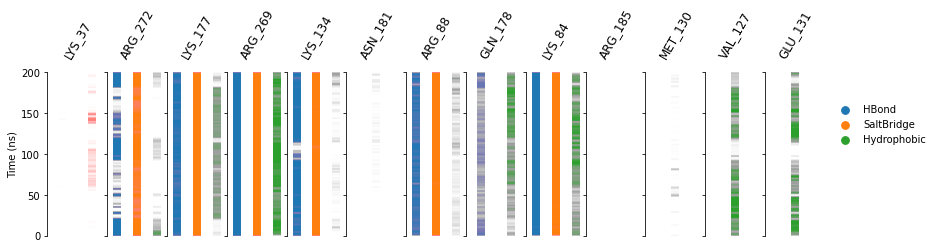

In [51]:

fig = df_catplot_short(dfcat_cit)
fig

In [52]:
fig.savefig('catplot_cit.tiff', dpi=300, transparent=False, facecolor='w', edgecolor='w')

## SLC25A1-ISO

In [53]:
iso_path=f'{workdir}/isocitrato/cpp_analysis'

In [54]:
dfhb_iso =pd.read_csv(f"{iso_path}/lig_hbonds/hb_series.dat", delim_whitespace=True)
dfhb_iso

,#Frame,ISO_299@O1-LYS_84@NZ-HZ1,ISO_299@O1-ARG_88@NH1-HH12,ISO_299@O3-ARG_88@NH1-HH12,ISO_299@O9-LYS_134@NZ-HZ1,ISO_299@O15-LYS_134@NZ-HZ2,ISO_299@O8-ARG_272@NH1-HH12,ISO_299@O8-ARG_272@NH2-HH22,ISO_299@O3-ARG_88@NH2-HH22,ISO_299@O12-ARG_272@NH1-HH12,...,ISO_299@O8-LYS_177@NZ-HZ3,ISO_299@O3-ASN_181@ND2-HD22,ISO_299@O3-ARG_185@NH1-HH11,ISO_299@O1-ARG_185@NH2-HH22,ISO_299@O12-LYS_84@NZ-HZ1,ISO_299@O8-LYS_177@NZ-HZ1,ISO_299@O3-GLN_182@NE2-HE22,ISO_299@O1-GLN_182@NE2-HE22,ISO_299@O3-ARG_185@NE-HE,ISO_299@O8-LYS_177@NZ-HZ2
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
19996,19997,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
19997,19998,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
19998,19999,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
import time

start = time.time()
dfcathb_iso = ctu.df_4catplot(dfhb_iso, 'ISO_299', 'HBond')
end = time.time()
print(end - start)

197.90568232536316


In [56]:
dfsb_iso = ctu.dfseries_sb(f"{iso_path}/lig_saltbridges")

In [57]:
dfsb_iso

,Frame,ISO_299@O1-LYS_84@NZ-HZ1,ISO_299@O1-LYS_84@NZ-HZ2,ISO_299@O1-LYS_84@NZ-HZ3,ISO_299@O14-LYS_84@NZ-HZ1,ISO_299@O14-LYS_84@NZ-HZ2,ISO_299@O14-LYS_84@NZ-HZ3,ISO_299@O1-ARG_88@NH1-HH11,ISO_299@O1-ARG_88@NH1-HH12,ISO_299@O3-ARG_88@NH1-HH11,...,ISO_299@O3-LYS_177@NZ-HZ1,ISO_299@O3-LYS_177@NZ-HZ2,ISO_299@O3-LYS_177@NZ-HZ3,ISO_299@O9-ARG_269@NE-HE,ISO_299@O3-ARG_185@NE-HE,ISO_299@O8-ARG_185@NH1-HH11,ISO_299@O8-ARG_185@NH1-HH12,ISO_299@O9-ARG_272@NE-HE,ISO_299@O9-ARG_185@NH1-HH11,ISO_299@O9-ARG_185@NH1-HH12
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19996,19997,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19997,19998,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19998,19999,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
import time

start = time.time()
dfcatsb_iso = ctu.df_4catplot(dfsb_iso, 'ISO_299', 'SaltBridge')
end = time.time()
print(end - start)

122.10041880607605


In [72]:
resinfo =  pd.read_csv(f"{iso_path}/lig_hydrophobics/resinfo.dat", delim_whitespace=True, skiprows=23, nrows=299)
resinfo

,#Res,Name,First,Last,Natom,#Orig,#Mol
0,1,ALA,1,12,12,1,1
1,2,PRO,13,26,14,2,1
2,3,ALA,27,36,10,3,1
3,4,SER,37,47,11,4,1
4,5,GLY,48,54,7,5,1
...,...,...,...,...,...,...,...
294,295,TRP,4603,4626,24,295,1
295,296,LYS,4627,4648,22,296,1
296,297,THR,4649,4662,14,297,1
297,298,ASP,4663,4675,13,298,1


In [73]:
# dfhp_iso = ctu.dfseries_hp(f"{iso_path}/lig_hydrophobics")

try:
    dfhp1_1 =pd.read_csv(f"{iso_path}/lig_hydrophobics/series.dat", delim_whitespace=True)
    dfhp1_1 = dfhp1_1.rename(columns={"#Frame": "Frame"})
except:
    dfhp1_1 = None
try:
    dfhp1_2 = pd.read_csv(f"{iso_path}/lig_hydrophobics/nnseries.dat", delim_whitespace=True)
    dfhp1_2 = dfhp1_2.rename(columns={"#Frame": "Frame"})
except:
    dfhp1_2 = None

if dfhp1_1 == None:
    
    dfhp1 = dfhp1_2
elif dfhp1_2 == None:
    dfhp1 = dfhp1_1
else:
    dfhp1_2 = dfhp1_2.drop(['Frame'], axis=1)
    dfhp1 = pd.concat([dfhp1_1, dfhp1_2], axis=1)
    
dfhp_iso = dfhp1

In [74]:
dfhp_iso

,Frame,:299@C2_:88@CZ,:299@C13_:134@CE,:299@C2_:84@CE,:299@C7_:272@CZ,:299@C4_:272@CZ,:299@C2_:84@CD,:299@C13_:134@CD,:299@C10_:27@CD,:299@C13_:27@CD,...,:299@C7_:225@CB,:299@C2_:181@CB,:299@C13_:84@CD,:299@C10_:84@CE,:299@C2_:185@CZ,:299@C4_:185@CZ,:299@C4_:177@CE,:299@C5_:177@CE,:299@C4_:181@CB,:299@C2_:182@CD
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,19997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,19998,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
import time

start = time.time()
dfcathp_iso = ctu.df_4catplot(dfhp_iso, 'ISO_299', 'Hydrophobic', resinfo=resinfo)
end = time.time()
print(end - start)

211.70414471626282


In [76]:
dfcat_iso = pd.concat([dfcathb_iso, dfcatsb_iso, dfcathp_iso] )


In [77]:
dfcat_iso

,Frame,Residue,value,interaction
19999,1,ARG_272,True,HBond
20000,2,ARG_272,True,HBond
20001,3,ARG_272,True,HBond
20002,4,ARG_272,True,HBond
20003,5,ARG_272,True,HBond
...,...,...,...,...
58284,2854,ILE_27,True,Hydrophobic
58285,2855,ILE_27,True,Hydrophobic
58286,2856,ILE_27,True,Hydrophobic
58287,2860,ILE_27,True,Hydrophobic


In [78]:
def df_catplot_short(df):
    g = sns.catplot(
        data=df, x="interaction", y="Frame", hue="interaction", col="Residue",
        hue_order=["HBond", "SaltBridge", "Hydrophobic"],
        height=3, aspect=0.3, jitter=0, sharex=False, marker="_", s=8, linewidth=.01,
    )
    # g.set_titles("{col_name}")
    g.set_titles("{col_name}")
    # g.set(xticks=[], ylim=(-.5, df_cat_s.Frame.max()+1))
    g.set(xticks=[], ylim=(0, 20000), yticks=np.arange(0,25000,5000))
    g.set_xticklabels([])
    g.set_xlabels("")
    g.set_ylabels("Time (ns)")
    # g.set_yticks(list(range(0,250,50))) # <--- set the ticks first
    g.set_yticklabels([0,50,100,150,200])
    g.fig.subplots_adjust(wspace=0)
    g.add_legend()
    g.despine(bottom=True)
    for ax in g.axes.flat:
    #     ax.invert_yaxis()
        ax.set_title(ax.get_title(), pad=15, rotation=60, ha="center", va="baseline")
    return g

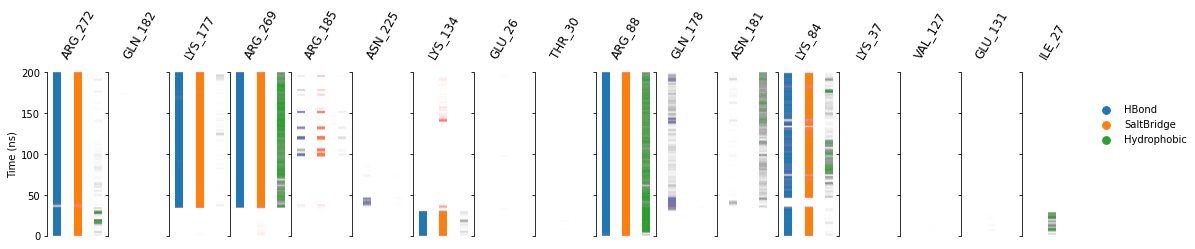

In [79]:
fig = df_catplot_short(dfcat_iso)
fig

In [80]:
fig.savefig('catplot_iso.tiff', dpi=300, transparent=False, facecolor='w', edgecolor='w')

## SLC25A1-MAL

In [81]:
mal_path=f'{workdir}/malato/cpp_analysis'

In [82]:
dfhb_mal =pd.read_csv(f"{mal_path}/lig_hbonds/hb_series.dat", delim_whitespace=True)
dfhb_mal

,#Frame,MAL_299@O1-LYS_37@NZ-HZ1,MAL_299@O3-LYS_134@NZ-HZ1,MAL_299@O10-LYS_177@NZ-HZ1,MAL_299@O10-ARG_269@NH1-HH12,GLU_131@OE2-MAL_299@O7-H13,MAL_299@O3-LYS_37@NZ-HZ1,MAL_299@O1-ARG_269@NH1-HH11,MAL_299@O3-LYS_232@NZ-HZ1,GLU_131@OE1-MAL_299@O7-H13,...,MAL_299@O7-SER_221@OG-HG1,MAL_299@O1-SER_221@OG-HG1,MAL_299@O7-ARG_269@NH2-HH21,ASN_225@OD1-MAL_299@O7-H13,SER_221@OG-MAL_299@O7-H13,MAL_299@O3-SER_221@OG-HG1,MAL_299@O1-ASN_225@ND2-HD22,MAL_299@O3-ASN_225@ND2-HD22,MAL_299@O10-GLN_178@NE2-HE22,MAL_299@O9-GLN_178@NE2-HE22
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,19997,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
19997,19998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
import time

start = time.time()
dfcathb_mal = ctu.df_4catplot(dfhb_mal, 'MAL_299', 'HBond')
end = time.time()
print(end - start)

212.4506061077118


In [84]:
dfsb_mal = ctu.dfseries_sb(f"{mal_path}/lig_saltbridges")

In [85]:
dfsb_mal

,Frame,MAL_299@O1-LYS_37@NZ-HZ1,MAL_299@O1-LYS_37@NZ-HZ2,MAL_299@O1-LYS_37@NZ-HZ3,MAL_299@O3-LYS_37@NZ-HZ1,MAL_299@O3-LYS_37@NZ-HZ2,MAL_299@O3-LYS_37@NZ-HZ3,MAL_299@O3-LYS_134@NZ-HZ1,MAL_299@O3-LYS_134@NZ-HZ2,MAL_299@O3-LYS_134@NZ-HZ3,...,MAL_299@O9-ARG_185@NH1-HH12,MAL_299@O10-ARG_272@NE-HE,MAL_299@O3-LYS_84@NZ-HZ1,MAL_299@O3-LYS_84@NZ-HZ2,MAL_299@O3-LYS_84@NZ-HZ3,MAL_299@O10-ARG_272@NH1-HH11,MAL_299@O10-ARG_272@NH1-HH12,MAL_299@O9-LYS_37@NZ-HZ1,MAL_299@O9-LYS_37@NZ-HZ2,MAL_299@O9-LYS_37@NZ-HZ3
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,19997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,19998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
import time

start = time.time()
dfcatsb_mal = ctu.df_4catplot(dfsb_mal, 'MAL_299', 'SaltBridge')
end = time.time()
print(end - start)

136.38371682167053


In [87]:
resinfo =  pd.read_csv(f"{mal_path}/lig_hydrophobics/resinfo.dat", delim_whitespace=True, skiprows=23, nrows=299)
resinfo

,#Res,Name,First,Last,Natom,#Orig,#Mol
0,1,ALA,1,12,12,1,1
1,2,PRO,13,26,14,2,1
2,3,ALA,27,36,10,3,1
3,4,SER,37,47,11,4,1
4,5,GLY,48,54,7,5,1
...,...,...,...,...,...,...,...
294,295,TRP,4603,4626,24,295,1
295,296,LYS,4627,4648,22,296,1
296,297,THR,4649,4662,14,297,1
297,298,ASP,4663,4675,13,298,1


In [88]:
dfhp_mal = ctu.dfseries_hp(f"{mal_path}/lig_hydrophobics")

In [89]:
dfhp_mal

,Frame,:299@C2_:37@CE,:299@C4_:34@CG,:299@C4_:34@CD,:299@C8_:269@CZ,:299@C4_:131@CD,:299@C5_:131@CD,:299@C2_:37@CD,:299@C2_:34@CG,:299@C2_:34@CD,...,:299@C4_:185@CZ,:299@C4_:221@CB,:299@C2_:273@CG2,:299@C2_:273@CG1,:299@C5_:272@CD,:299@C4_:225@CG,:299@C2_:221@CB,:299@C8_:272@CD,:299@C2_:181@CB,:299@C5_:273@CG2
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,19997,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,19998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19999,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
import time

start = time.time()
dfcathp_mal = ctu.df_4catplot(dfhp_mal, 'MAL_299', 'Hydrophobic', resinfo=resinfo)
end = time.time()
print(end - start)

242.29225778579712


In [91]:
dfcat_mal = pd.concat([dfcathb_mal, dfcatsb_mal, dfcathp_mal] )


In [92]:
dfcat_mal

,Frame,Residue,value,interaction
19999,2232,ASP_229,True,HBond
20000,2404,ASP_229,True,HBond
20001,2416,ASP_229,True,HBond
20002,4104,ASP_229,True,HBond
20003,1,LYS_37,True,HBond
...,...,...,...,...
55345,4973,GLU_131,True,Hydrophobic
55346,4974,GLU_131,True,Hydrophobic
55347,4978,GLU_131,True,Hydrophobic
55348,4980,GLU_131,True,Hydrophobic


In [93]:
def df_catplot_short(df):
    g = sns.catplot(
        data=df, x="interaction", y="Frame", hue="interaction", col="Residue",
        hue_order=["HBond", "SaltBridge", "Hydrophobic"],
        height=3, aspect=0.3, jitter=0, sharex=False, marker="_", s=8, linewidth=.01,
    )
    # g.set_titles("{col_name}")
    g.set_titles("{col_name}")
    # g.set(xticks=[], ylim=(-.5, df_cat_s.Frame.max()+1))
    g.set(xticks=[], ylim=(0, 20000), yticks=np.arange(0,25000,5000))
    g.set_xticklabels([])
    g.set_xlabels("")
    g.set_ylabels("Time (ns)")
    # g.set_yticks(list(range(0,250,50))) # <--- set the ticks first
    g.set_yticklabels([0,50,100,150,200])
    g.fig.subplots_adjust(wspace=0)
    g.add_legend()
    g.despine(bottom=True)
    for ax in g.axes.flat:
    #     ax.invert_yaxis()
        ax.set_title(ax.get_title(), pad=15, rotation=60, ha="center", va="baseline")
    return g

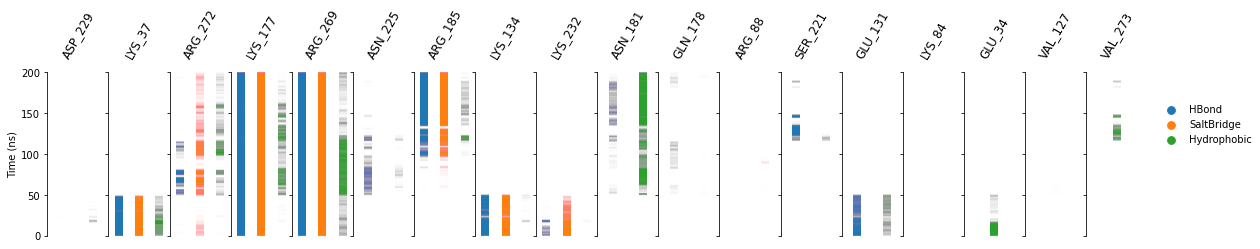

In [94]:
fig = df_catplot_short(dfcat_mal)
fig

In [95]:
fig.savefig('catplot_mal.tiff', dpi=300, transparent=False, facecolor='w', edgecolor='w')